<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/bitcoins_mined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from io import StringIO
import requests
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# 1) Download the full historical series (date,value) for total mined BTC
url = "https://api.blockchain.info/charts/total-bitcoins?timespan=all&format=csv&sampled=false"
csv_text = requests.get(url, timeout=30).text

In [3]:
# 2) Load to DataFrame
df = pd.read_csv(StringIO(csv_text), header=None, names=["date", "btc_mined"])
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

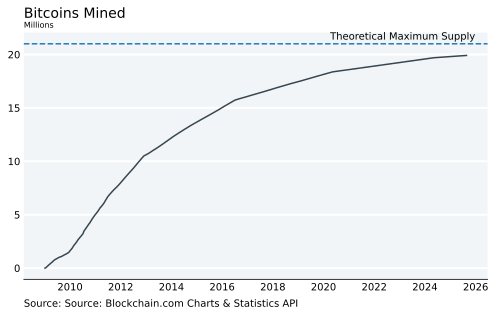

In [33]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.06, s='Bitcoins Mined', transform=ax.transAxes, size=14)
ax.text(0., 1.02, s='Millions', transform=ax.transAxes, size=8)

plt.plot(df['btc_mined']/1_000_000, color='#36454F')
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)
ax.text(ax.get_xlim()[1] * 0.89, 21.2, 'Theoretical Maximum Supply',
        ha='left', va='bottom', fontsize=10)
ax.axhline(21, linestyle='--')
ax.annotate("Source: Source: Blockchain.com Charts & Statistics API",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center")
fig.savefig('./bitcoin_supply.png')
plt.show()